In [1]:
%matplotlib inline
import matplotlib as mpl
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

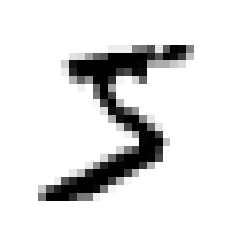

In [6]:
some_digit=np.array(X_train.iloc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

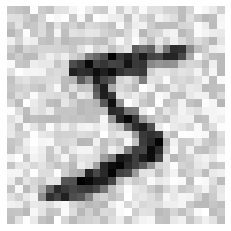

In [40]:
some_index=np.array(X_train_mod.iloc[0])
some_digit_image = some_index.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [47]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure noisy_digit_example_plot


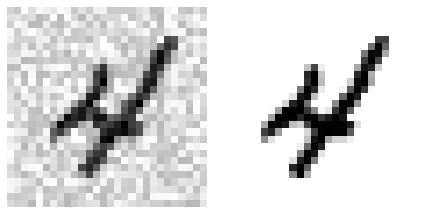

In [54]:
some_index = 9
plt.subplot(121); plot_digit(np.array(X_train_mod.iloc[some_index]))
plt.subplot(122); plot_digit(np.array(X_train.iloc[some_index]))
save_fig("noisy_digit_example_plot")
plt.show()

D:\Courses\machine_learning\machine_learning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


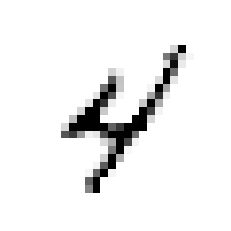

In [55]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([np.array(X_train_mod.iloc[some_index])])
plot_digit(clean_digit)